# Taiwan Election Prediction: Exploratory Data Analysis (EDA)

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
sns.set_palette('husl')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

## 1. Load Data

In [4]:
# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
print(f"\n Number of districts: {len(df)}")
print(f"Number of variables: {len(df.columns)}")

# Display first few rows
df.head()

Data shape: (20, 30)

 Number of districts: 20
Number of variables: 30


,District,Winner,Total_Votes,Ko_Wu,Ko_Wu_Pct,Lai_Hsiao,Lai_Hsiao_Pct,Hou_Chao,Hou_Chao_Pct,Total_Population,Age_0_14,Age_0_14_Pct,Age_15_64,Age_15_64_Pct,Age_65_Plus,Age_65_Plus_Pct,Income,Disposable_Income,Consumption,Households,Avg_People_Per_HH,Total_15Plus,Higher_Education_Pct,Graduate_Pct,College_Pct,JuniorCollege_Pct,HighSchool_Pct,Junior_Pct,Primary_Pct,Illiterate_Pct
0,Taipei City,Lai_Hsiao,1542011,366854,23.79,587899,38.13,587258,38.08,4.04e+06,455890.0,11.28,2.85e+06,70.61,732166.0,18.11,1803192,1485461,1136637,1067481,2.71,2187844,65.72,15.25,38.23,12.24,21.97,6.24,5.69,0.39
1,New Taipei City,Lai_Hsiao,2458480,645105,26.24,948818,38.59,864557,35.17,2.51e+06,309600.0,12.33,1.65e+06,65.55,555463.0,22.12,1472606,1219151,909382,1686441,2.75,3601907,51.90,8.59,31.64,11.67,28.58,11.71,7.26,0.55
2,Taoyuan City,Lai_Hsiao,1350792,413528,30.61,476441,35.27,460823,34.12,2.32e+06,318321.0,13.73,1.65e+06,71.12,351336.0,15.15,1514458,1240719,922775,915413,2.99,2024131,51.55,8.44,32.43,10.68,30.55,10.22,7.05,0.63
3,Taichung City,Lai_Hsiao,1707203,513025,30.05,641622,37.58,552556,32.37,2.85e+06,377523.0,13.26,2.02e+06,70.87,451807.0,15.87,1427394,1171877,973022,1072458,2.82,2488030,52.67,8.98,32.45,11.24,29.31,10.02,7.37,0.64
4,Tainan City,Lai_Hsiao,1120238,262560,23.44,570811,50.95,286867,25.61,1.86e+06,211436.0,11.37,1.30e+06,69.78,350662.0,18.85,1225320,1009768,776782,732432,2.81,1650022,49.01,8.81,30.34,9.85,28.30,10.95,10.90,0.85


In [5]:
# Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              20 non-null     object 
 1   Winner                20 non-null     object 
 2   Total_Votes           20 non-null     int64  
 3   Ko_Wu                 20 non-null     int64  
 4   Ko_Wu_Pct             20 non-null     float64
 5   Lai_Hsiao             20 non-null     int64  
 6   Lai_Hsiao_Pct         20 non-null     float64
 7   Hou_Chao              20 non-null     int64  
 8   Hou_Chao_Pct          20 non-null     float64
 9   Total_Population      20 non-null     float64
 10  Age_0_14              20 non-null     float64
 11  Age_0_14_Pct          20 non-null     float64
 12  Age_15_64             20 non-null     float64
 13  Age_15_64_Pct         20 non-null     float64
 14  Age_65_Plus           20 non-null     float64
 15  Age_65_Plus_Pct       20 

## 2. Descriptive Statistics

In [6]:
# Statistical summary of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Votes,20.0,6.95e+05,6.89e+05,49277.00,2.54e+05,3.30e+05,1.18e+06,2.46e+06
Ko_Wu,20.0,1.84e+05,1.82e+05,12202.00,6.51e+04,9.76e+04,2.86e+05,6.45e+05
Ko_Wu_Pct,20.0,2.66e+01,3.85e+00,21.65,2.37e+01,2.61e+01,2.92e+01,3.55e+01
Lai_Hsiao,20.0,2.79e+05,2.84e+05,19023.00,8.80e+04,1.30e+05,5.00e+05,9.49e+05
Lai_Hsiao_Pct,20.0,3.84e+01,7.61e+00,24.78,3.48e+01,3.81e+01,4.46e+01,5.10e+01
Hou_Chao,20.0,2.32e+05,2.32e+05,18052.00,8.40e+04,1.19e+05,3.30e+05,8.65e+05
Hou_Chao_Pct,20.0,3.50e+01,6.50e+00,25.61,3.05e+01,3.35e+01,3.80e+01,5.05e+01
Total_Population,20.0,1.16e+06,1.14e+06,107745.00,4.28e+05,5.62e+05,1.97e+06,4.04e+06
Age_0_14,20.0,1.39e+05,1.38e+05,10517.00,3.97e+04,7.05e+04,2.35e+05,4.56e+05
Age_0_14_Pct,20.0,1.16e+01,1.85e+00,8.49,1.04e+01,1.13e+01,1.23e+01,1.58e+01


In [7]:
# Election results statistics
print("="*60)
print("Election Results Statistics")
print("="*60)

print("\nDistricts won by each candidate:")
print(df['Winner'].value_counts())

print("\nAverage vote share by candidate:")
print(f"Lai-Hsiao: {df['Lai_Hsiao_Pct'].mean():.2f}%")
print(f"Hou-Chao: {df['Hou_Chao_Pct'].mean():.2f}%")
print(f"Ko-Wu: {df['Ko_Wu_Pct'].mean():.2f}%")

print("\nTotal votes: {:,}".format(df['Total_Votes'].sum()))

Election Results Statistics

Districts won by each candidate:
Winner
Lai_Hsiao    14
Hou_Chao      6
Name: count, dtype: int64

Average vote share by candidate:
Lai-Hsiao: 38.39%
Hou-Chao: 34.98%
Ko-Wu: 26.63%

Total votes: 13,895,915


## 3. Visualization Analysis

### 3.1 Election Results Distribution

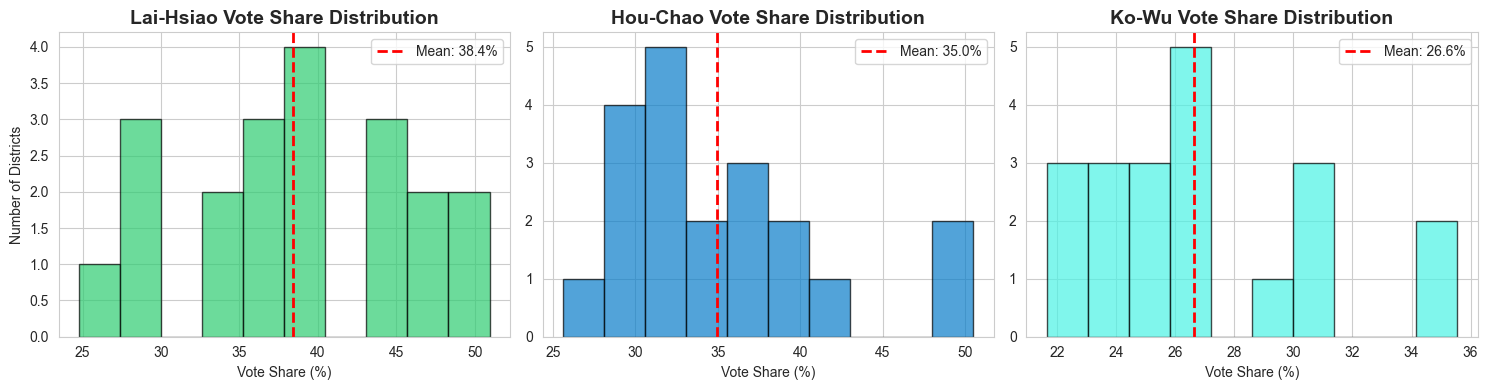

In [24]:
# Vote share distribution by candidate
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Lai-Hsiao
axes[0].hist(df['Lai_Hsiao_Pct'], bins=10, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].axvline(df['Lai_Hsiao_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Lai_Hsiao_Pct'].mean():.1f}%")
axes[0].set_title('Lai-Hsiao Vote Share Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Vote Share (%)')
axes[0].set_ylabel('Number of Districts')
axes[0].legend()

# Hou-Chao
axes[1].hist(df['Hou_Chao_Pct'], bins=10, color="#097DCA", alpha=0.7, edgecolor='black')
axes[1].axvline(df['Hou_Chao_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Hou_Chao_Pct'].mean():.1f}%")
axes[1].set_title('Hou-Chao Vote Share Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Vote Share (%)')
axes[1].legend()

# Ko-Wu
axes[2].hist(df['Ko_Wu_Pct'], bins=10, color="#4bf3e5", alpha=0.7, edgecolor='black')
axes[2].axvline(df['Ko_Wu_Pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Ko_Wu_Pct'].mean():.1f}%")
axes[2].set_title('Ko-Wu Vote Share Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Vote Share (%)')
axes[2].legend()

plt.tight_layout()
plt.savefig('../results/figures/vote_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2 Age Structure Analysis

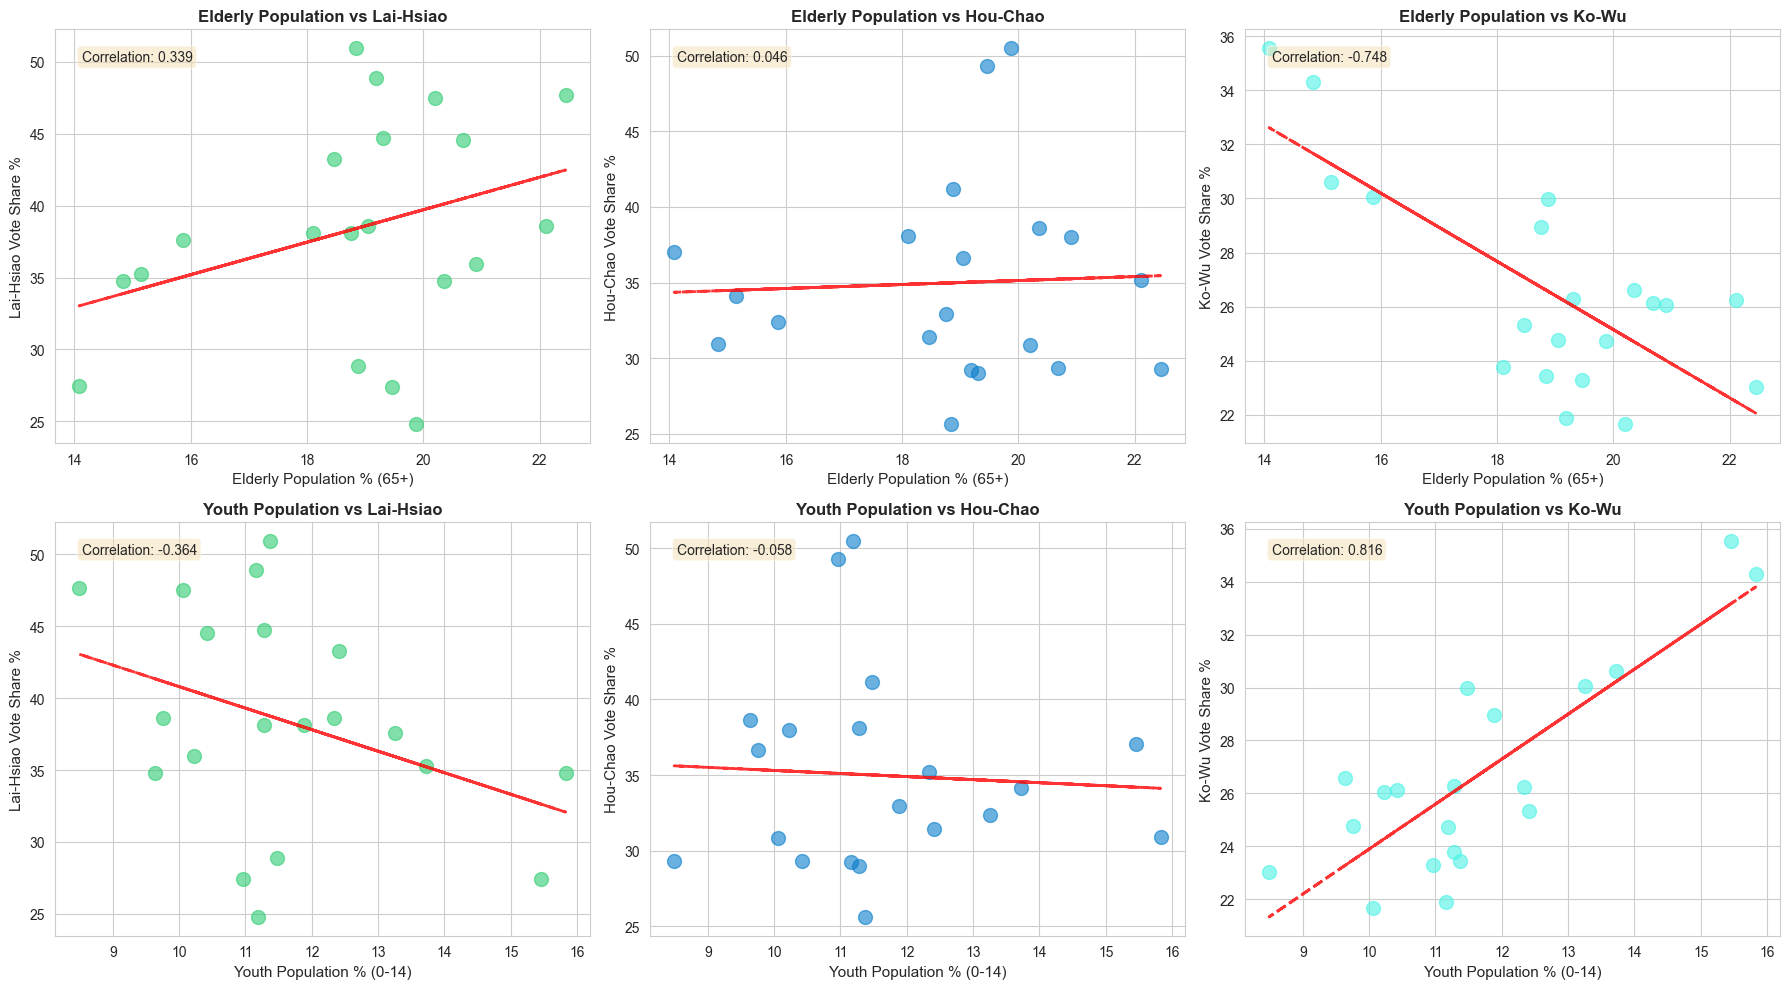

In [25]:
# Age structure vs voting patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Elderly population vs candidate vote shares
axes[0, 0].scatter(df['Age_65_Plus_Pct'], df['Lai_Hsiao_Pct'], s=100, alpha=0.6, color='#2ecc71')
axes[0, 0].set_xlabel('Elderly Population % (65+)', fontsize=11)
axes[0, 0].set_ylabel('Lai-Hsiao Vote Share %', fontsize=11)
axes[0, 0].set_title('Elderly Population vs Lai-Hsiao', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_65_Plus_Pct'], df['Lai_Hsiao_Pct'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Age_65_Plus_Pct'], p(df['Age_65_Plus_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_65_Plus_Pct'].corr(df['Lai_Hsiao_Pct'])
axes[0, 0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

axes[0, 1].scatter(df['Age_65_Plus_Pct'], df['Hou_Chao_Pct'], s=100, alpha=0.6, color="#097DCA")
axes[0, 1].set_xlabel('Elderly Population % (65+)', fontsize=11)
axes[0, 1].set_ylabel('Hou-Chao Vote Share %', fontsize=11)
axes[0, 1].set_title('Elderly Population vs Hou-Chao', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_65_Plus_Pct'], df['Hou_Chao_Pct'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['Age_65_Plus_Pct'], p(df['Age_65_Plus_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_65_Plus_Pct'].corr(df['Hou_Chao_Pct'])
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

axes[0, 2].scatter(df['Age_65_Plus_Pct'], df['Ko_Wu_Pct'], s=100, alpha=0.6, color="#4bf3e5")
axes[0, 2].set_xlabel('Elderly Population % (65+)', fontsize=11)
axes[0, 2].set_ylabel('Ko-Wu Vote Share %', fontsize=11)
axes[0, 2].set_title('Elderly Population vs Ko-Wu', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_65_Plus_Pct'], df['Ko_Wu_Pct'], 1)
p = np.poly1d(z)
axes[0, 2].plot(df['Age_65_Plus_Pct'], p(df['Age_65_Plus_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_65_Plus_Pct'].corr(df['Ko_Wu_Pct'])
axes[0, 2].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0, 2].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

# Youth population vs candidate vote shares
axes[1, 0].scatter(df['Age_0_14_Pct'], df['Lai_Hsiao_Pct'], s=100, alpha=0.6, color='#2ecc71')
axes[1, 0].set_xlabel('Youth Population % (0-14)', fontsize=11)
axes[1, 0].set_ylabel('Lai-Hsiao Vote Share %', fontsize=11)
axes[1, 0].set_title('Youth Population vs Lai-Hsiao', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_0_14_Pct'], df['Lai_Hsiao_Pct'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['Age_0_14_Pct'], p(df['Age_0_14_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_0_14_Pct'].corr(df['Lai_Hsiao_Pct'])
axes[1, 0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

axes[1, 1].scatter(df['Age_0_14_Pct'], df['Hou_Chao_Pct'], s=100, alpha=0.6, color="#097DCA")
axes[1, 1].set_xlabel('Youth Population % (0-14)', fontsize=11)
axes[1, 1].set_ylabel('Hou-Chao Vote Share %', fontsize=11)
axes[1, 1].set_title('Youth Population vs Hou-Chao', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_0_14_Pct'], df['Hou_Chao_Pct'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df['Age_0_14_Pct'], p(df['Age_0_14_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_0_14_Pct'].corr(df['Hou_Chao_Pct'])
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

axes[1, 2].scatter(df['Age_0_14_Pct'], df['Ko_Wu_Pct'], s=100, alpha=0.6, color="#4bf3e5")
axes[1, 2].set_xlabel('Youth Population % (0-14)', fontsize=11)
axes[1, 2].set_ylabel('Ko-Wu Vote Share %', fontsize=11)
axes[1, 2].set_title('Youth Population vs Ko-Wu', fontsize=12, fontweight='bold')
z = np.polyfit(df['Age_0_14_Pct'], df['Ko_Wu_Pct'], 1)
p = np.poly1d(z)
axes[1, 2].plot(df['Age_0_14_Pct'], p(df['Age_0_14_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Age_0_14_Pct'].corr(df['Ko_Wu_Pct'])
axes[1, 2].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 2].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top')

plt.tight_layout()
plt.savefig('../results/figures/age_vs_vote.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.3 Economic Factors Analysis

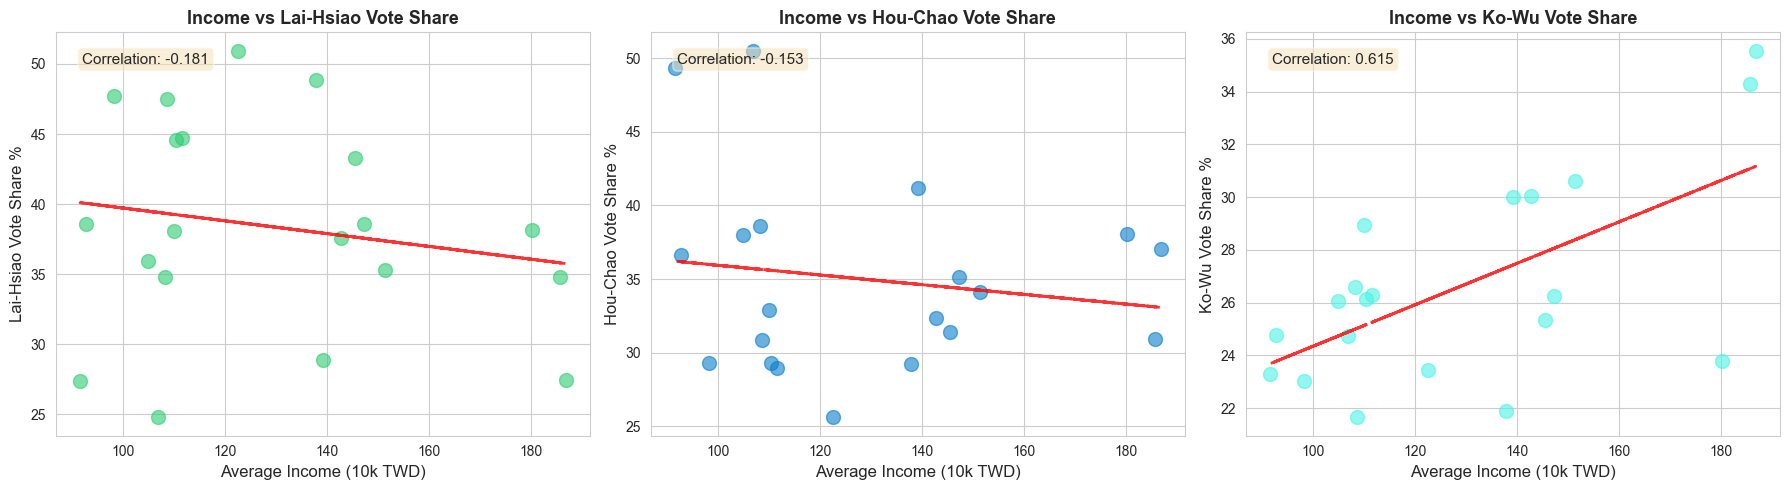

In [27]:
# Income vs voting patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income vs Lai-Hsiao
axes[0].scatter(df['Income']/10000, df['Lai_Hsiao_Pct'], s=100, alpha=0.6, color='#2ecc71')
axes[0].set_xlabel('Average Income (10k TWD)', fontsize=12)
axes[0].set_ylabel('Lai-Hsiao Vote Share %', fontsize=12)
axes[0].set_title('Income vs Lai-Hsiao Vote Share', fontsize=13, fontweight='bold')
z = np.polyfit(df['Income'], df['Lai_Hsiao_Pct'], 1)
p = np.poly1d(z)
axes[0].plot(df['Income']/10000, p(df['Income']), "r--", alpha=0.8, linewidth=2)
corr = df['Income'].corr(df['Lai_Hsiao_Pct'])
axes[0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

# Income vs Hou-Chao
axes[1].scatter(df['Income']/10000, df['Hou_Chao_Pct'], s=100, alpha=0.6, color="#097DCA")
axes[1].set_xlabel('Average Income (10k TWD)', fontsize=12)
axes[1].set_ylabel('Hou-Chao Vote Share %', fontsize=12)
axes[1].set_title('Income vs Hou-Chao Vote Share', fontsize=13, fontweight='bold')
z = np.polyfit(df['Income'], df['Hou_Chao_Pct'], 1)
p = np.poly1d(z)
axes[1].plot(df['Income']/10000, p(df['Income']), "r--", alpha=0.8, linewidth=2)
corr = df['Income'].corr(df['Hou_Chao_Pct'])
axes[1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

# Income vs Ko-Wu
axes[2].scatter(df['Income']/10000, df['Ko_Wu_Pct'], s=100, alpha=0.6, color="#4bf3e5")
axes[2].set_xlabel('Average Income (10k TWD)', fontsize=12)
axes[2].set_ylabel('Ko-Wu Vote Share %', fontsize=12)
axes[2].set_title('Income vs Ko-Wu Vote Share', fontsize=13, fontweight='bold')
z = np.polyfit(df['Income'], df['Ko_Wu_Pct'], 1)
p = np.poly1d(z)
axes[2].plot(df['Income']/10000, p(df['Income']), "r--", alpha=0.8, linewidth=2)
corr = df['Income'].corr(df['Ko_Wu_Pct'])
axes[2].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[2].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

plt.tight_layout()
plt.savefig('../results/figures/income_vs_vote.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.4 Education Level Analysis

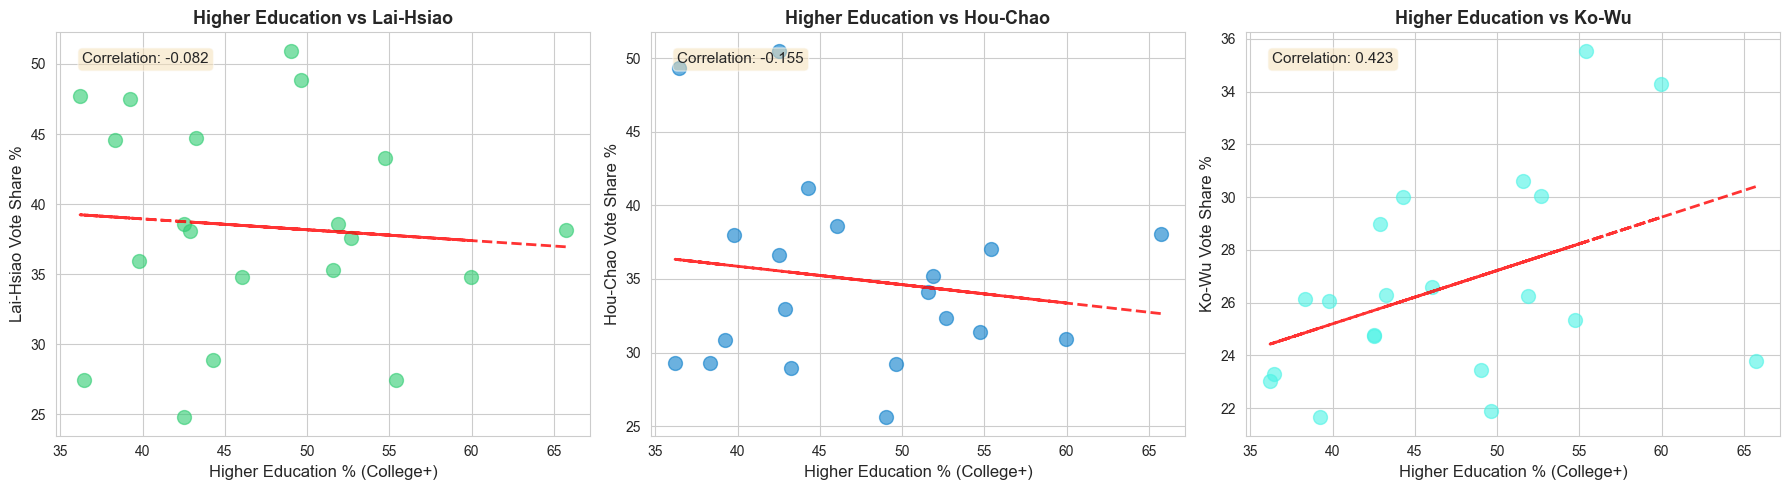

In [26]:
# Higher education vs voting patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Higher education vs Lai-Hsiao
axes[0].scatter(df['Higher_Education_Pct'], df['Lai_Hsiao_Pct'], s=100, alpha=0.6, color='#2ecc71')
axes[0].set_xlabel('Higher Education % (College+)', fontsize=12)
axes[0].set_ylabel('Lai-Hsiao Vote Share %', fontsize=12)
axes[0].set_title('Higher Education vs Lai-Hsiao', fontsize=13, fontweight='bold')
z = np.polyfit(df['Higher_Education_Pct'], df['Lai_Hsiao_Pct'], 1)
p = np.poly1d(z)
axes[0].plot(df['Higher_Education_Pct'], p(df['Higher_Education_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Higher_Education_Pct'].corr(df['Lai_Hsiao_Pct'])
axes[0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

# Higher education vs Hou-Chao
axes[1].scatter(df['Higher_Education_Pct'], df['Hou_Chao_Pct'], s=100, alpha=0.6, color="#097DCA")
axes[1].set_xlabel('Higher Education % (College+)', fontsize=12)
axes[1].set_ylabel('Hou-Chao Vote Share %', fontsize=12)
axes[1].set_title('Higher Education vs Hou-Chao', fontsize=13, fontweight='bold')
z = np.polyfit(df['Higher_Education_Pct'], df['Hou_Chao_Pct'], 1)
p = np.poly1d(z)
axes[1].plot(df['Higher_Education_Pct'], p(df['Higher_Education_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Higher_Education_Pct'].corr(df['Hou_Chao_Pct'])
axes[1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

# Higher education vs Ko-Wu
axes[2].scatter(df['Higher_Education_Pct'], df['Ko_Wu_Pct'], s=100, alpha=0.6, color="#4bf3e5")
axes[2].set_xlabel('Higher Education % (College+)', fontsize=12)
axes[2].set_ylabel('Ko-Wu Vote Share %', fontsize=12)
axes[2].set_title('Higher Education vs Ko-Wu', fontsize=13, fontweight='bold')
z = np.polyfit(df['Higher_Education_Pct'], df['Ko_Wu_Pct'], 1)
p = np.poly1d(z)
axes[2].plot(df['Higher_Education_Pct'], p(df['Higher_Education_Pct']), "r--", alpha=0.8, linewidth=2)
corr = df['Higher_Education_Pct'].corr(df['Ko_Wu_Pct'])
axes[2].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[2].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), verticalalignment='top', fontsize=11)

plt.tight_layout()
plt.savefig('../results/figures/education_vs_vote.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.5 Correlation Heatmap

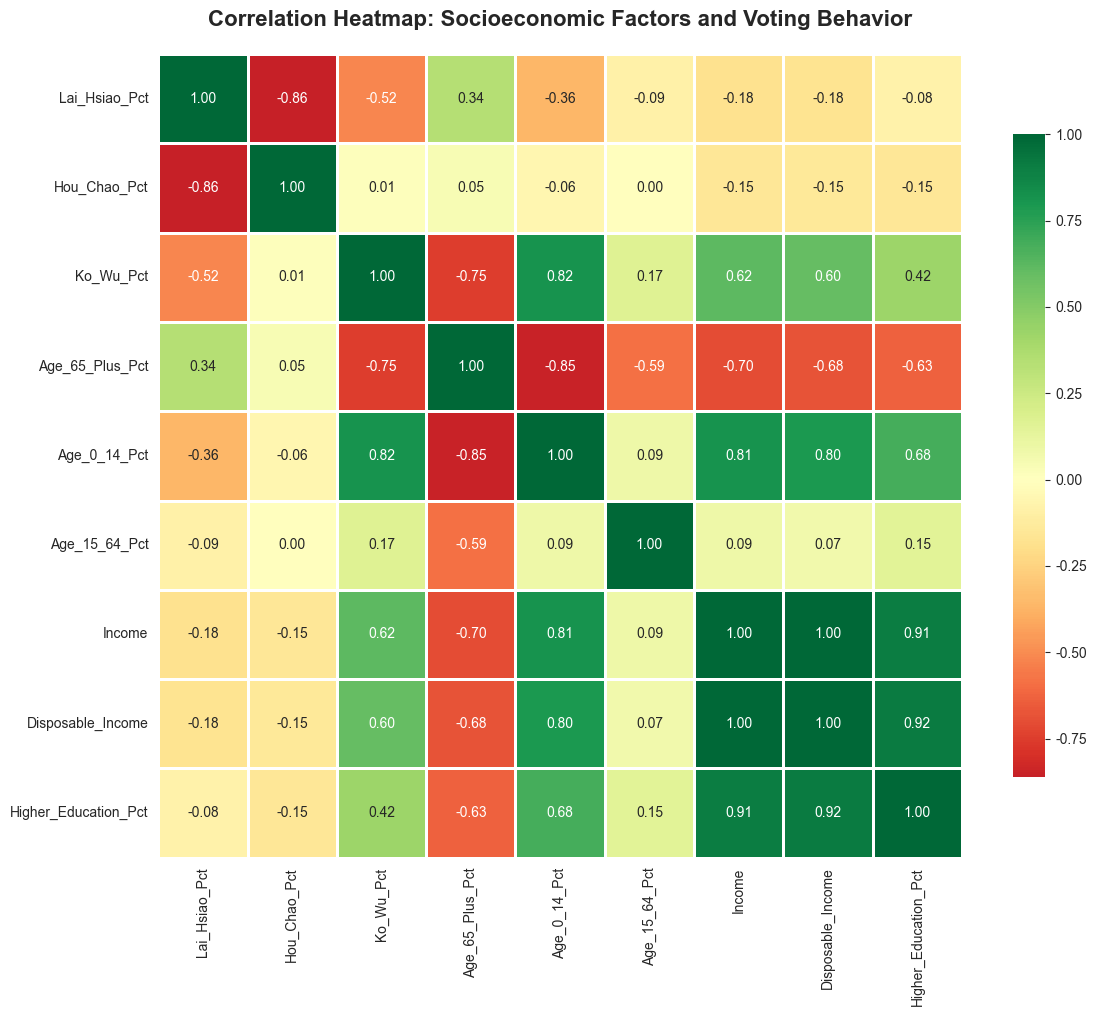

In [28]:
# Select key variables for correlation analysis
key_vars = ['Lai_Hsiao_Pct', 'Hou_Chao_Pct', 'Ko_Wu_Pct',
            'Age_65_Plus_Pct', 'Age_0_14_Pct', 'Age_15_64_Pct',
            'Income', 'Disposable_Income', 'Higher_Education_Pct']

corr_matrix = df[key_vars].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Socioeconomic Factors and Voting Behavior', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Key Findings Summary

In [29]:
# Calculate key correlations
print("="*60)
print("Key Correlation Analysis")
print("="*60)

print("\n[Age Structure Impact]")
print(f"Elderly population vs Lai-Hsiao: {df['Age_65_Plus_Pct'].corr(df['Lai_Hsiao_Pct']):.3f}")
print(f"Elderly population vs Hou-Chao: {df['Age_65_Plus_Pct'].corr(df['Hou_Chao_Pct']):.3f}")
print(f"Elderly population vs Ko-Wu: {df['Age_65_Plus_Pct'].corr(df['Ko_Wu_Pct']):.3f}")

print("\n[Economic Factors Impact]")
print(f"Average income vs Lai-Hsiao: {df['Income'].corr(df['Lai_Hsiao_Pct']):.3f}")
print(f"Average income vs Hou-Chao: {df['Income'].corr(df['Hou_Chao_Pct']):.3f}")
print(f"Average income vs Ko-Wu: {df['Income'].corr(df['Ko_Wu_Pct']):.3f}")

print("\n[Education Level Impact]")
print(f"Higher education vs Lai-Hsiao: {df['Higher_Education_Pct'].corr(df['Lai_Hsiao_Pct']):.3f}")
print(f"Higher education vs Hou-Chao: {df['Higher_Education_Pct'].corr(df['Hou_Chao_Pct']):.3f}")
print(f"Higher education vs Ko-Wu: {df['Higher_Education_Pct'].corr(df['Ko_Wu_Pct']):.3f}")

Key Correlation Analysis

[Age Structure Impact]
Elderly population vs Lai-Hsiao: 0.339
Elderly population vs Hou-Chao: 0.046
Elderly population vs Ko-Wu: -0.748

[Economic Factors Impact]
Average income vs Lai-Hsiao: -0.181
Average income vs Hou-Chao: -0.153
Average income vs Ko-Wu: 0.615

[Education Level Impact]
Higher education vs Lai-Hsiao: -0.082
Higher education vs Hou-Chao: -0.155
Higher education vs Ko-Wu: 0.423
